## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [24]:
train, test = keras.datasets.cifar10.load_data()

In [32]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x):
    x = x.reshape((len(x),-1))
    MM = MinMaxScaler()
    MM.fit_transform(x)
    return x 
    

def preproc_y(y,num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [33]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [35]:
x_train.shape

(50000, 3072)

In [41]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model


In [45]:
model = build_mlp(input_shape  = x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [46]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [47]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [48]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 15ms/step - loss: 57.8203 - accuracy: 0.1210 - val_loss: 3.3883 - val_accuracy: 0.1843
Epoch 2/100
196/196 [==============================] - 3s 13ms/step - loss: 3.0145 - accuracy: 0.2026 - val_loss: 2.4783 - val_accuracy: 0.2083
Epoch 3/100
196/196 [==============================] - 3s 13ms/step - loss: 2.4131 - accuracy: 0.2414 - val_loss: 2.6139 - val_accuracy: 0.2122
Epoch 4/100
196/196 [==============================] - 3s 14ms/step - loss: 2.1543 - accuracy: 0.2724 - val_loss: 2.2220 - val_accuracy: 0.2394
Epoch 5/100
196/196 [==============================] - 3s 15ms/step - loss: 2.0168 - accuracy: 0.3065 - val_loss: 2.0163 - val_accuracy: 0.2932
Epoch 6/100
196/196 [==============================] - 3s 15ms/step - loss: 2.0157 - accuracy: 0.3069 - val_loss: 1.8894 - val_accuracy: 0.3532
Epoch 7/100
196/196 [==============================] - 3s 14ms/step - loss: 1.9216 - accuracy: 0.3362 - val_loss: 1.8385 - val_accuracy

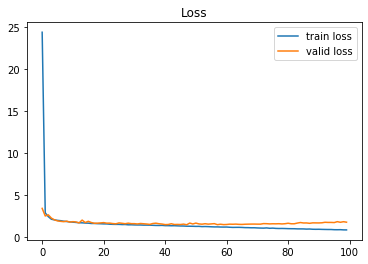

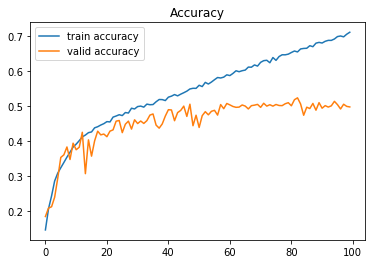

In [50]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()